# Problem Statement:
Build a machine learning model using a Multi-Layer Perceptron (MLP) to classify handwritten digits (0-9) from the MNIST dataset. The dataset consists of 60,000 training images and 10,000 test images, where each image is a 28x28 pixel grayscale representation of a digit.

In [1]:
#Install necessory libraries
!pip install matplotlib
!pip install keras
!pip install tensorflow

In [24]:
# Importing necessary libraries for data manipulation, visualization, and model building
import matplotlib.pyplot as plt  # For plotting graphs
from keras.layers import Dense, Flatten  # For creating neural network layers
from keras.models import Sequential  # For creating a sequential model
from keras.utils import to_categorical  # For converting labels to one-hot encoding
from keras.datasets import mnist  # For importing the MNIST dataset
from keras import utils  # For various utility functions
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the necessary module from Keras
from keras.datasets import mnist

# Load the MNIST dataset, which is a dataset of handwritten digits
# x_train and y_train are the training data and labels respectively
# x_test and y_test are the testing data and labels respectively
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Display the shape of the y_test array
# y_test is the array containing the labels for the test dataset
# The shape attribute returns a tuple representing the dimensions of the array
# This is useful for understanding the structure and size of the test labels
print(y_test.shape)


(10000,)


In [5]:
# Display the shape of the x_train array
# x_train is the array containing the training data (images of handwritten digits)
# The shape attribute returns a tuple representing the dimensions of the array
# This helps to understand the number of training samples and their dimensions
print(x_train.shape)


(60000, 28, 28)


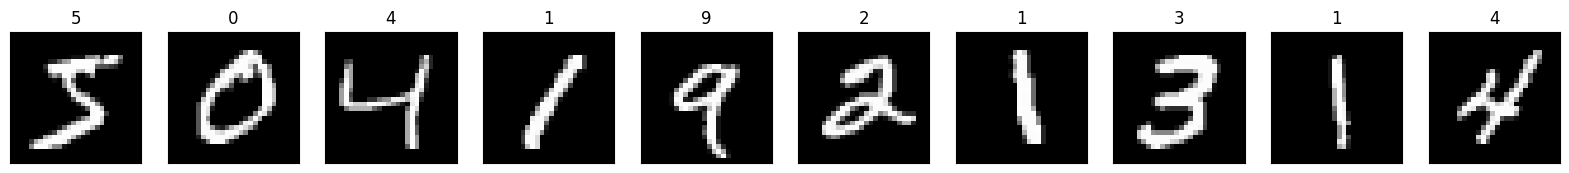

In [6]:
# Let's plot the first 10 images from the training dataset
# Create a figure and an array of subplots
# ncols=10: Specifies the number of columns in the subplot grid (10 columns)
# sharex=False: Determines whether the x-axis is shared among subplots (not shared)
# sharey=True: Determines whether the y-axis is shared among subplots (shared)
# figsize=(20, 4): Specifies the width and height of the figure in inches (20 inches wide, 4 inches tall)
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
# Loop through the first 10 images
for i in range(10):
    # Set the title of each subplot to the corresponding label in y_train
    axes[i].set_title(y_train[i])
    # Display each image in grayscale
    axes[i].imshow(x_train[i], cmap='gray')
    # Hide the x-axis
    axes[i].get_xaxis().set_visible(False)
    # Hide the y-axis
    axes[i].get_yaxis().set_visible(False)

# Show the plot
plt.show()


In [7]:
# Let's convert the labels to categorical format
# This code converts the labels into a one-hot encoded format with 10 dimensions
# Each label will be represented as a binary vector of length 10
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [8]:
# Let's check how the labels look after converting to categorical format
print(y_train)


[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [9]:
# Let's check the y_test labels to see how they look after conversion to categorical format
print(y_test)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
# Let's check the shape of the y_test array
# This provides information about the dimensions of the y_test array
print(y_test.shape)


(10000, 10)


In [11]:
# Define a Sequential model, which allows adding layers sequentially
model = Sequential()

# Add a Flatten layer to convert the 28x28 input images into a 1D array
# Input shape is set to (28, 28) representing the dimensions of the input images
model.add(Flatten(input_shape=(28, 28)))

# Add a Dense layer with 10 neurons and 'sigmoid' activation function
model.add(Dense(10, activation='sigmoid'))

# Add another Dense layer with 5 neurons and 'sigmoid' activation function
model.add(Dense(5, activation='sigmoid'))

# Add the output layer with 10 neurons (one for each class) and 'softmax' activation function
# Softmax is used for multi-class classification to output probabilities for each class
model.add(Dense(10, activation='softmax'))


In [12]:
# Display a summary of the model architecture, including the number of parameters in each layer
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,965 (31.11 KB)

 Trainable params: 7,965 (31.11 KB)

 Non-trainable params: 0 (0.00 B)

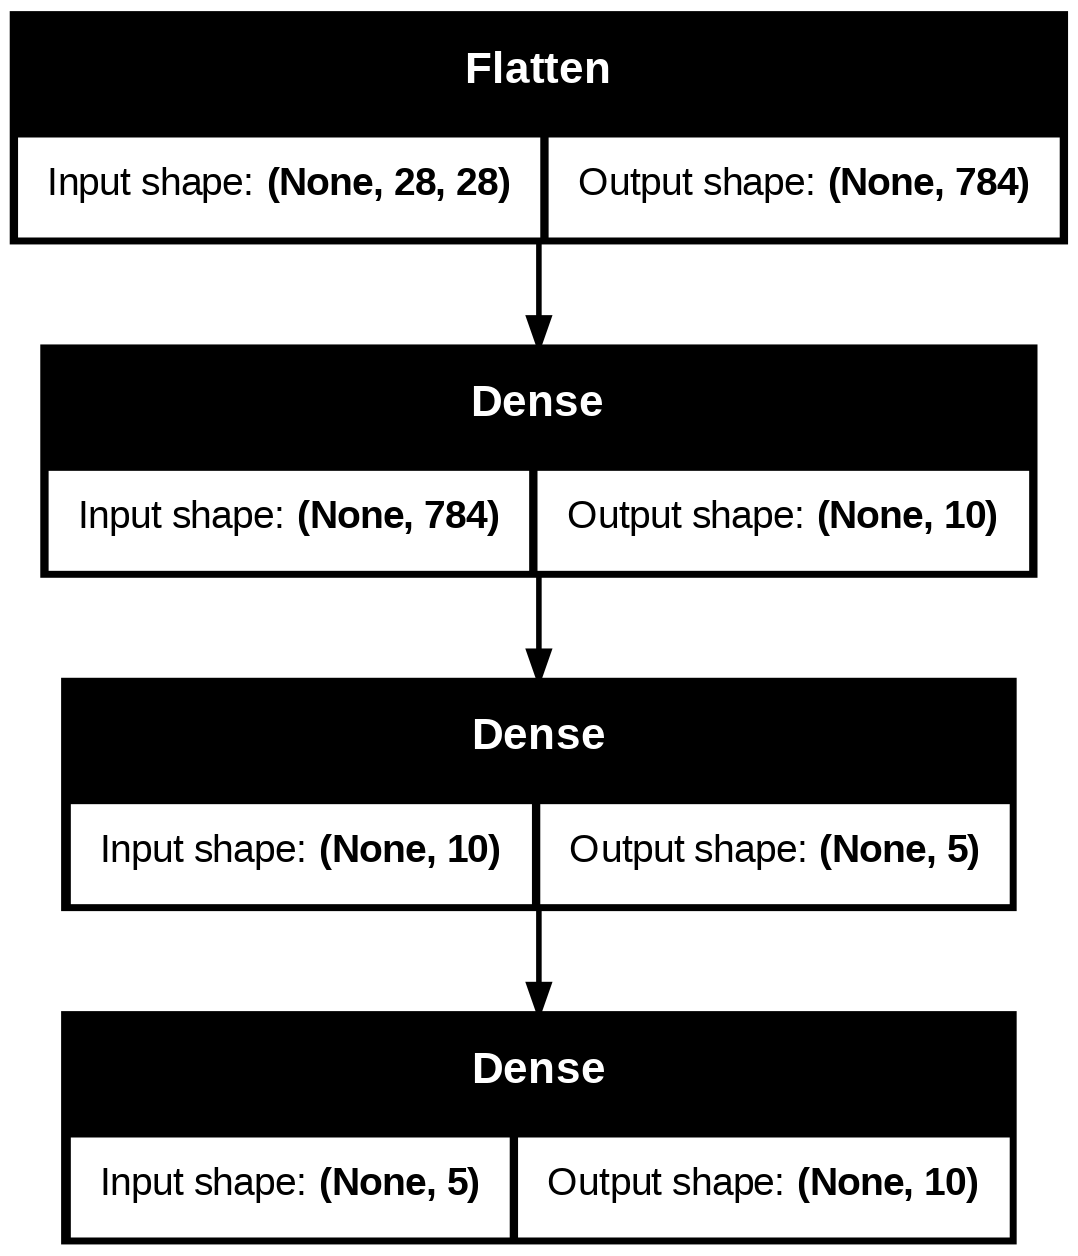

In [13]:
# Visualize the architecture of the model with its layer shapes
utils.plot_model(model, show_shapes=True)


In [14]:
!pip install pydot

In [15]:
# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [18]:
# Train the model for one epoch on the training data and validate on the test data, storing the training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - acc: 0.3021 - loss: 2.0874 - val_acc: 0.6328 - val_loss: 1.3988
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.6486 - loss: 1.3000 - val_acc: 0.6746 - val_loss: 1.0674
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.6933 - loss: 1.0194 - val_acc: 0.7218 - val_loss: 0.9294
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.7218 - loss: 0.8907 - val_acc: 0.7223 - val_loss: 0.8449
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - acc: 0.7471 - loss: 0.8143 - val_acc: 0.7718 - val_loss: 0.7704
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.7729 - loss: 0.7561 - val_acc: 0.7650 - val_loss: 0.7664
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.7684 - loss: 0.7581 - val_acc: 0.7869 - val_loss: 0.7363
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - acc: 0.7839 - loss: 0.7262 - val_acc: 0.7849 - val_loss: 0.7089
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━

In [19]:
# Saving the trained model to a file named 'mnist_models_scifer.h5'
model.save('mnist_models_scifors.h5')

In [20]:
# Printing the training history containing the loss and accuracy metrics
print(history.history)

{'acc': [0.4502333402633667, 0.6663833260536194, 0.6960999965667725, 0.725266695022583, 0.7536166906356812, 0.7750999927520752, 0.7775166630744934, 0.7866666913032532, 0.796583354473114, 0.7997499704360962], 'loss': [1.8393782377243042, 1.2159361839294434, 0.989154577255249, 0.8707014322280884, 0.80730801820755, 0.7520474791526794, 0.7380169630050659, 0.7164947390556335, 0.6971045136451721, 0.6858801245689392], 'val_acc': [0.6327999830245972, 0.6746000051498413, 0.7218000292778015, 0.7222999930381775, 0.7717999815940857, 0.7649999856948853, 0.786899983882904, 0.7849000096321106, 0.807699978351593, 0.8162999749183655], 'val_loss': [1.3987877368927002, 1.0673679113388062, 0.9294129014015198, 0.8448530435562134, 0.7703624963760376, 0.76642906665802, 0.7363175749778748, 0.708910346031189, 0.6652196049690247, 0.6378759741783142]}


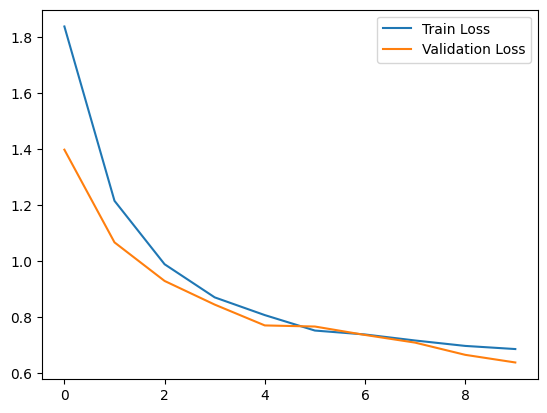

In [21]:
# Plotting the training loss curve
plt.plot(history.history['loss'], label='Train Loss')

# Plotting the validation loss curve
plt.plot(history.history['val_loss'], label='Validation Loss')

# Adding legend to the plot
plt.legend()


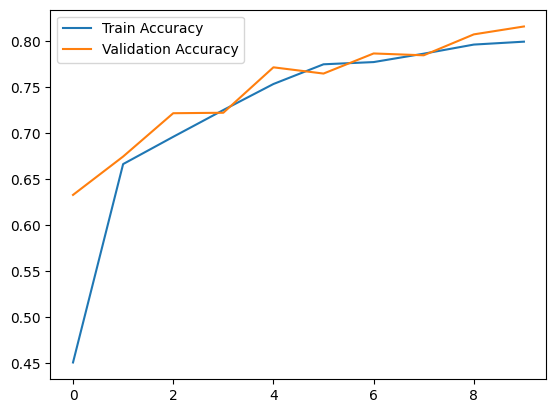

In [22]:
# Plotting the training accuracy curve
plt.plot(history.history['acc'], label='Train Accuracy')

# Plotting the validation accuracy curve
plt.plot(history.history['val_acc'], label='Validation Accuracy')

# Adding legend to the plot
plt.legend()


In [25]:
# Loading the pre-trained model from the file 'mnist_models_scifer.h5'
model = tf.keras.models.load_model('mnist_models_scifors.h5')

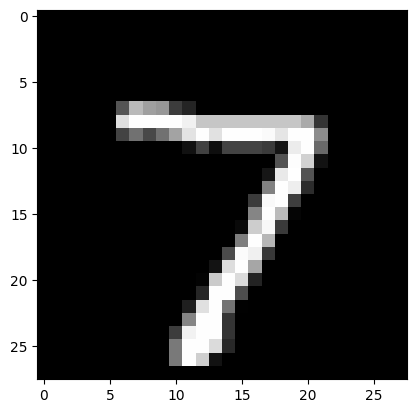

In [26]:
# Displaying the first test image from the dataset
plt.imshow(x_test[0], cmap='gray')


In [27]:
# Importing the NumPy library
import numpy as np

# Reshaping the first test image to match the model's input shape
x = np.reshape(x_test[0], (1, 28, 28))

# Using the trained model to predict the class label for the input image
predicted_label = model.predict(x)

# Printing the predicted class label
print(predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[[1.5263849e-05 4.9654400e-04 7.3006563e-03 8.3880071e-03 3.4371188e-03
  3.3632599e-04 4.0414675e-06 9.0418899e-01 1.7856365e-03 7.4047312e-02]]


In [28]:
a=[6,9,7,45,6,9,7,4,52,1,3,6,55,]


In [29]:
np.argmax(a)

12

In [30]:
np.argmax(predicted_label)

7